# Determination of lightning length from light curves

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd
from scipy.signal import find_peaks
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [7]:
raise
'''
d = [{'dir':"/storage/experiments/2021/0605_bourka_radosovice",'snap':564.9549943},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica",'snap':620.2000009}
#"/storage/experiments/2021/0713_bourka_exit29_D8",\
#"/storage/experiments/2021/0609_bourka_sobeslav"]
#"/storage/experiments/2021/0713_bourka_exit29_D8",\ # stroboskopicka bourka, nelze rozlisit jednotlive blesky
    ]
'''
d = [\
{'dir':"/storage/experiments/2021/0605_bourka_radosovice",'snap':564.9549943, 'day':True},\
{'dir':"/storage/experiments/2021/0609_bourka_sobeslav",'snap':348.1999993, 'day':True},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica",'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0714_bourka_martin",'snap':620.2000009}, 'day':True,\
{'dir':"/storage/experiments/2021/0714_bourka_sobeslav",'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0725_bourka_ratmirov",'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0726_bourka_zabori",'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0803_bourka_votice",'snap':620.2000009}, 'day':True,\
{'dir':"/storage/experiments/2021/0807_bourka_sobeslav",'snap':620.2000009}, 'day':True,\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto1",'snap':620.2000009}, 'day':True,\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto0",'snap':620.2000009}, 'day':True,\
{'dir':"/storage/experiments/2021/0816_bourka_sobeslav",'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0822_bourka_sobeslav_auto0",'snap':620.2000009, 'day':True}]
#'''

files = pd.DataFrame( columns=['name', 'duration'])

WINDOW_SIZE = 100

for directory in d:
    print(directory['dir'],directory['snap'])

    for f in glob.iglob(directory['dir'] + "/video/x/*.csv"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        ss = f.split('.')
        sss= (ss[0]+'.'+ss[1]).split('/x')
        ff = sss[0]+sss[1]
        
        snap = directory['snap'] 
        
        # Import light curve
        light_curve = pd.read_csv(f, names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        #signal_samples=light_curve[["illuminance"]].to_numpy()
        maximum = max(light_curve["illuminance"].iloc[10:10+WINDOW_SIZE])
        minimum = min(light_curve["illuminance"].iloc[10:10+WINDOW_SIZE])
        amplitude = maximum - minimum
        stddev = light_curve["illuminance"].iloc[10:10+WINDOW_SIZE].std()
        avg = light_curve["illuminance"].iloc[10:10+WINDOW_SIZE].mean()
        print(minimum, maximum, avg, stddev)
        peaks, properties = find_peaks(light_curve["illuminance"], prominence = 8*stddev, wlen=WINDOW_SIZE)
        #xx = light_curve["illuminance"].rolling(100).mean()
        try:
            print(properties["prominences"].min(), properties["prominences"].max())

            peaks = peaks[peaks > 100]
            files = files.append({'name':f,'duration':round((peaks[-1] - peaks[0]) * snap /1000000, 3)}, ignore_index=True)
            print(round((peaks[-1] - peaks[0]) * snap /1000000, 3), 's')
        except:
            pass        
        
        #peaks, _ = find_peaks(light_curve["illuminance"], prominence = properties["prominences"].max())
        
        try:
            plt.figure(figsize=(15,1))
            plt.yscale('log')
            #plt.plot(signal_samples,c='gray')
            plt.plot(light_curve["illuminance"],c='gray')
            #plt.plot(xx,c='red')
            #plt.ylim(minimum,minimum+(maximum-minimum)/5)
            plt.plot(peaks,light_curve[["illuminance"]].iloc[peaks], ls='', marker='+', color='red')
            plt.axvspan(peaks[0],peaks[-1],alpha=0.3)
            #plt.plot(light_curve["illuminance"].loc[light_curve["illuminance"]>(avg+stddev/2)], color='red')
            #plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
            plt.title(f)
            plt.show()
        except:
            pass

RuntimeError: No active exception to reraise

/storage/experiments/2021/0605_bourka_radosovice 564.9549943 True
1.1346665396341464 38.524790396341466 39.65945693597561 39.12291859756099 0.25041102791553926
2.379512195121954 116.95573742378049
0.063 s


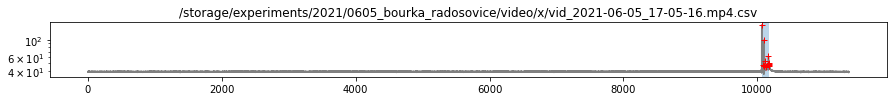

0.7821951219512187 73.849453125 74.63164824695122 74.18692677210369 0.15708073261165392
2.0706230945122 4.6395217225609855
0.327 s


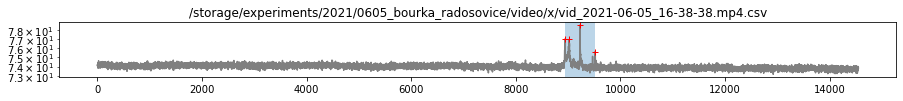

1.2951848323170623 43.28399771341464 44.579182545731705 43.94287900152439 0.2540635991669516
44.074533155487806 44.074533155487806
0.0 s


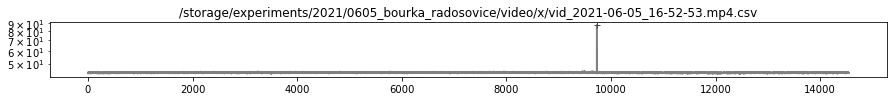

/storage/experiments/2021/0609_bourka_sobeslav 348.1999993 True
0.28930182437851215 81.67041023456295 81.95971205894146 81.81958926423417 0.05865614763489499
0.8945569366479589 12.581618384121882
0.349 s


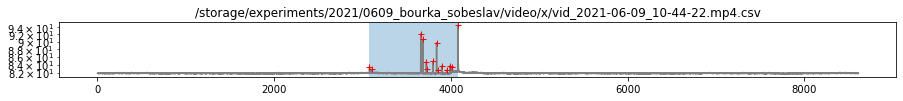

0.31299493785084564 84.62558390136327 84.93857883921412 84.79739250451082 0.058188204004616904
3.829563452285484 73.69652917000803
0.018 s


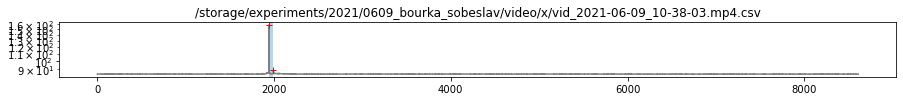

0.21263657778669653 101.91300496190858 102.12564153969528 102.02443247544107 0.04882461932180639
0.42950957297513526 12.245930232558138
0.155 s


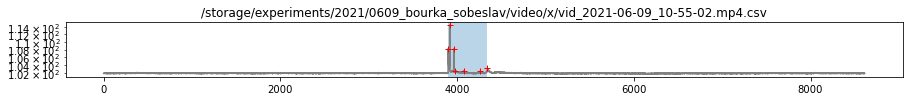

0.2591958199679283 90.77499749398557 91.0341933139535 90.91444982959098 0.05115539680351051
0.9216143744988017 40.339113873295915
0.353 s


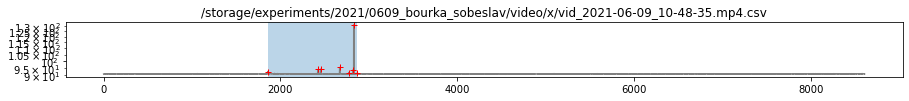

/storage/experiments/2021/0711_bourka_stiavnica 620.2000009 True
0.4931631097560967 208.7058517530488 209.1990148628049 208.96299706554876 0.09758888881967027
1.2395236280487438 64.53223894817071
0.363 s


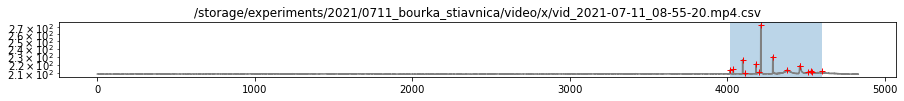

0.702543826219511 129.77481516768293 130.47735899390244 130.03328227896347 0.15529016823307765
1.4940701219512107 10.068934832317098
0.416 s


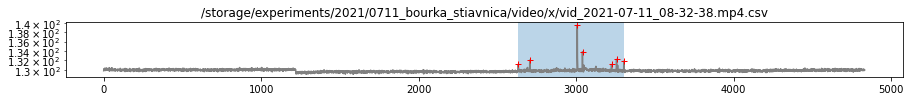

1.124346417682915 204.1360041920732 205.2603506097561 204.61455693597557 0.24671424123874658
2.2591387195121513 62.26627477134144
0.928 s


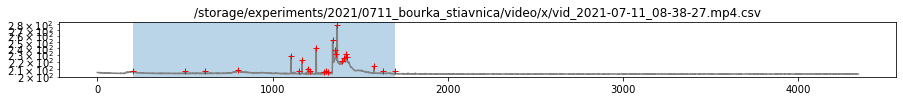

0.4062309451219335 243.8723418445122 244.27857278963413 244.04552107469502 0.08151649388312665
0.849817073170783 29.841789253048773
0.922 s


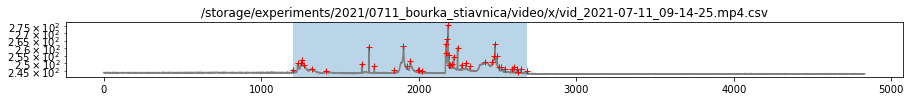

0.6256421493902451 153.97103658536585 154.5966787347561 154.26911330030492 0.13738983497465293
1.2782145579268445 188.10403772865854
1.124 s


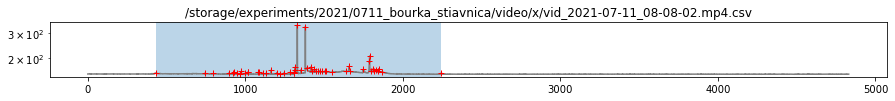

0.3828849085365391 254.7336242378049 255.11650914634143 254.90705564024384 0.07926264332516793
0.7769302591464111 18.613612804878045
0.754 s


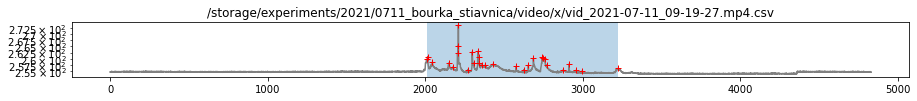

0.602124618902451 129.36106897865852 129.96319359756097 129.65722618140245 0.13019813377967684
1.3104897103658573 10.055207698170733
0.416 s


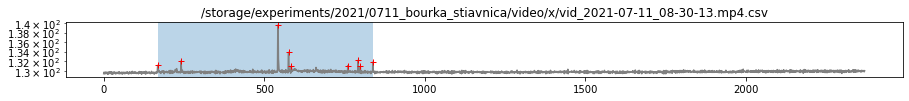

0.8326410060975604 95.84489138719512 96.67753239329268 96.28249523628047 0.18497016317538698
2.0111261432926852 153.317587652439
0.548 s


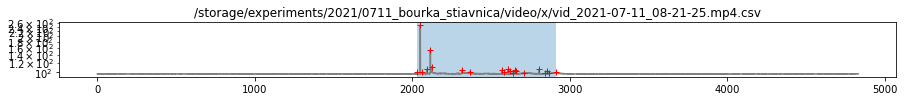

0.4161909298780415 231.75403963414635 232.1702305640244 231.96092189405488 0.08880708300061274
0.9293635670731817 41.14204458841462
1.07 s


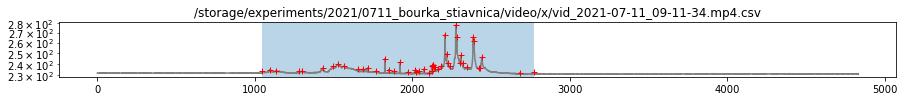

0.6047522865853807 149.78203887195122 150.3867911585366 150.05837721036585 0.12152090443248414
1.2621341463414808 4.625078125000016
0.132 s


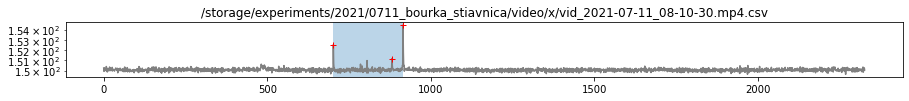

0.7236871189024328 139.57147675304878 140.29516387195122 139.9269267530488 0.14778710834432557
1.47526105182925 56.72655106707319
0.373 s


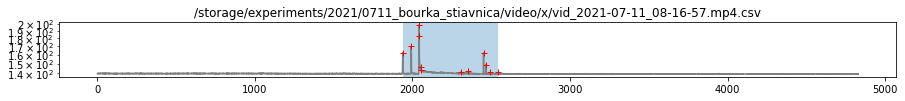

1.0391489574979857 128.71231580793906 129.75146476543705 129.1717212184242 0.18665819792390545
2.20336056535686 221.60693038291902
0.316 s


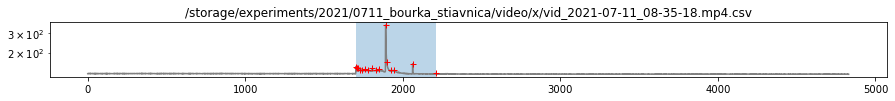

0.4735213414634529 209.6165663109756 210.09008765243905 209.87560847942063 0.09307098184049861
1.049733231707279 8.634113948170722
0.017 s


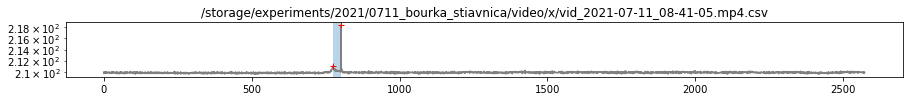

13.604424542682892 196.48657393292683 210.09099847560972 200.45017917301828 5.933398512372654
52.528084984756106 97.71853277439027
0.078 s


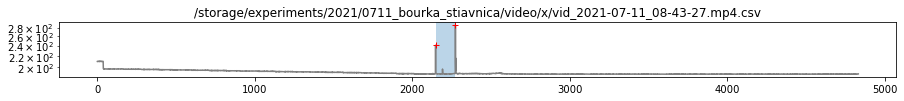

0.6870884146341609 145.80700457317073 146.4940929878049 146.1339509908536 0.15405590400540456
1.6398723323170827 50.67992759146341
0.605 s


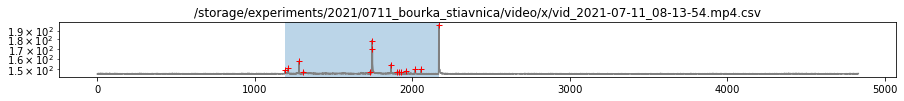

0.4613833841463588 245.7564100609756 246.21779344512197 245.9600026105183 0.09024887642136833
1.1249237804877907 32.72596417682925
0.36 s


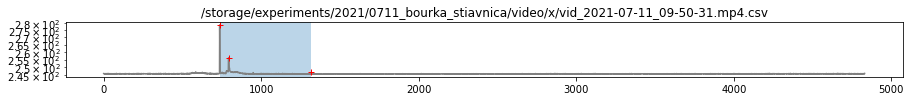

0.3476181402439238 254.67869855182929 255.0263166920732 254.85456244283552 0.07849521222889763
0.7145464939024464 18.680815548780487
0.754 s


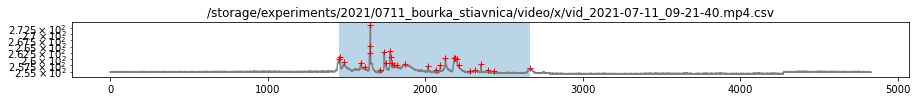

0.41088224085368097 237.16615663109755 237.57703887195123 237.38401263338415 0.08383366274190296
0.9200457317073187 41.183384146341496
0.263 s


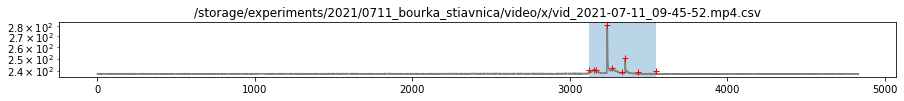

0.6903887195121854 135.45794969512195 136.14833841463414 135.7934903772866 0.13205163517812474
1.456240472560978 84.14782964939022
0.432 s


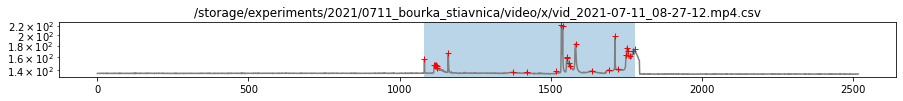

0.6261528201219733 185.79698551829267 186.42313833841465 186.06625960365852 0.10843010399350252
1.2883269817073142 144.60092035060978
0.561 s


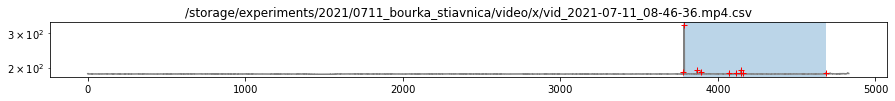

0.478328887195147 214.4123894817073 214.89071836890244 214.65342116996948 0.10137957052813004
1.0217473323170907 60.815041920731744
0.306 s


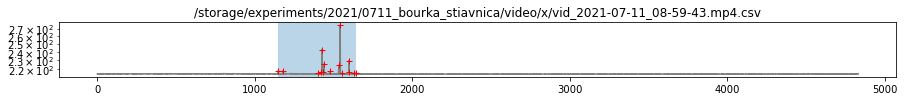

/storage/experiments/2021/0714_bourka_martin 620.2000009 True
0.8425634021651973 112.89933841218924 113.74190181435443 113.33773513933441 0.20676602512414244
1.9697473937449956 89.9114662690457
0.736 s


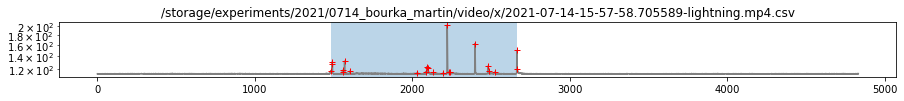

0.7079252706495538 152.4985891138733 153.20651438452285 152.86524196822373 0.1564016353029326
1.7834302325581177 9.682449127906978
0.693 s


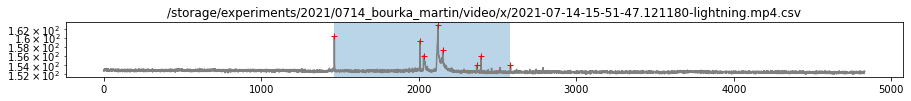

0.6714402064955891 141.9634773456295 142.6349175521251 142.2668464063753 0.15360247916381384
1.4850553829190005 73.4636064053729
1.221 s


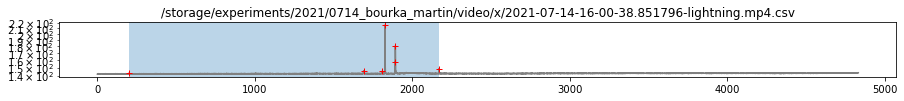

0.8175922213311964 124.10647679430632 124.92406901563751 124.53400395950277 0.17739830272563845
1.6522040396952633 72.14896752205296
0.804 s


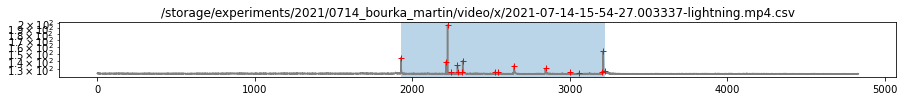

/storage/experiments/2021/0714_bourka_sobeslav 620.2000009 True
0.7603239329268376 111.18317835365852 111.94350228658536 111.52718231707318 0.21805200622013737
1.8922522865854035 21.494182545731718
0.543 s


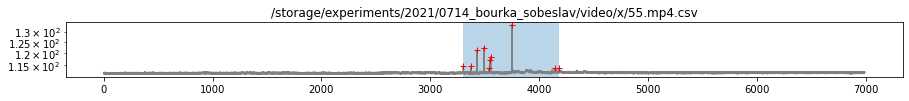

/storage/experiments/2021/0725_bourka_ratmirov 620.2000009 False
0.020223536487570096 0.1248897353648757 0.1451132718524458 0.13115230302726544 0.0031727981123804705
0.043732457898957494 146.8974125400962
0.465 s


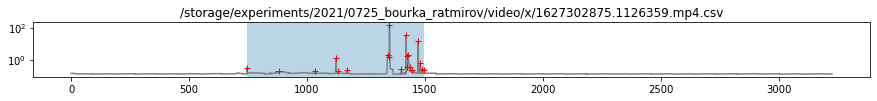

0.03679706295108259 0.4122255914194065 0.4490226543704891 0.42988788091419416 0.00698712192541478
0.0917502004811549 4.440141339214113
0.363 s


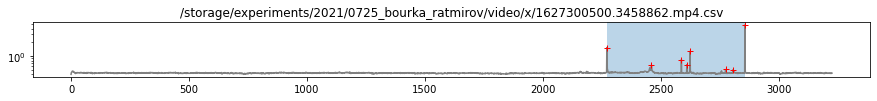

0.01744937850842021 0.1244386527666399 0.1418880312750601 0.12865969576984765 0.0028596793777847527
0.07842446872493988 9.721957698476343
0.343 s


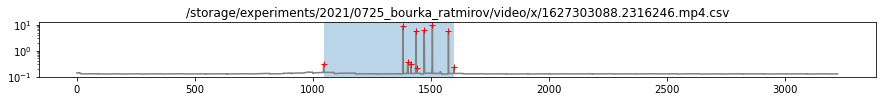

0.09209978949478748 1.6591795308740978 1.7512793203688852 1.6932992306535686 0.014258897110023334
0.18516188853247773 49.66237469927827
0.538 s


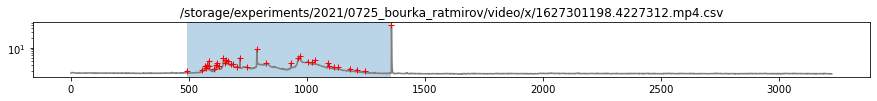

0.041304129911788334 0.806456746190858 0.8477608761026464 0.8268978924418603 0.008106944317311088
0.08478849238171615 273.30736016439454
1.102 s


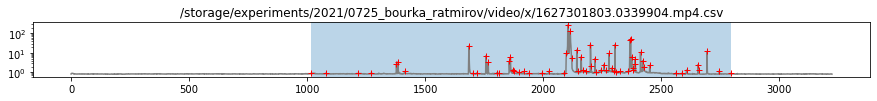

0.047487720529270305 0.4056097133119486 0.4530974338412189 0.42729216369286294 0.008743021739127391
0.09547914995990392 85.50713838211708
0.729 s


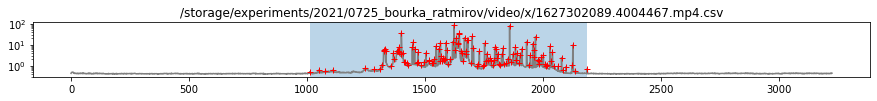

0.10147854851643956 2.093485615477145 2.1949641639935846 2.1319968674819574 0.01813604014133387
0.20970829991980722 45.49044707297514
0.923 s


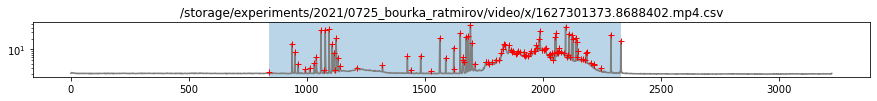

0.06589940858059373 0.9921636928628708 1.0580631014434645 1.0256469150962308 0.013171412776917385
0.13699754410585419 73.49761678027265
0.527 s


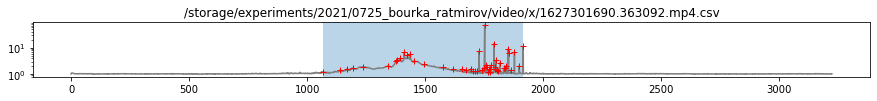

0.04827335605453087 0.4693702385725742 0.5176435946271051 0.4885215893143544 0.008515608093763949
0.09771576784282276 134.7683803628709
1.145 s


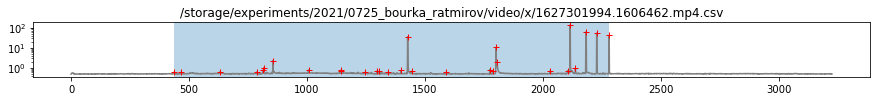

0.053299168003207775 1.4625263131515638 1.5158254811547716 1.485079691259022 0.009873544770007936
0.11012805733761022 27.19404445669607
0.564 s


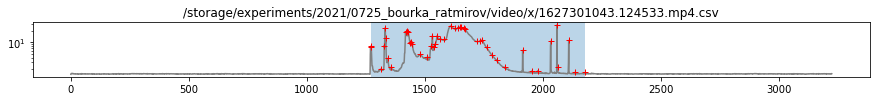

0.022922514033680896 0.128791599839615 0.1517141138732959 0.13939309342421813 0.004093407374754755
0.047465166399358494 52.67605002004811
0.44 s


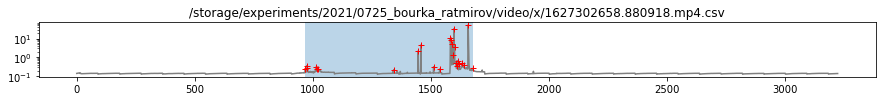

0.0440444566960706 0.2503433239775461 0.2943877806736167 0.2653502029871691 0.007735829103076507
0.09118634723336072 170.0485953789094
1.025 s


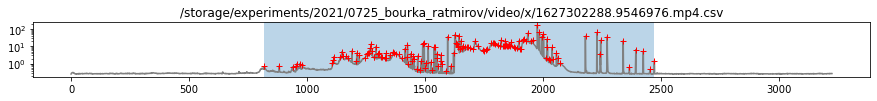

0.019610815958299915 0.1236906074578989 0.1433014234161988 0.12879013382117077 0.002731570985867803
0.03957122093023249 256.98303428227746
1.418 s


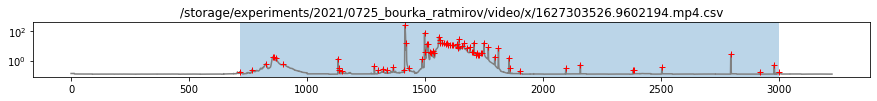

0.07104175020048098 1.160906174819567 1.231947925020048 1.181388331996792 0.013567630139262371
0.14306836407377732 96.71327811748196
0.914 s


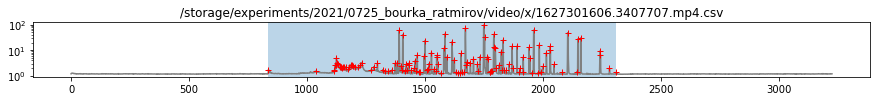

0.0326245489174018 0.3237645348837209 0.3563890838011227 0.3349564204089814 0.006804327631201689
0.07409407578187654 157.46866479550923
0.571 s


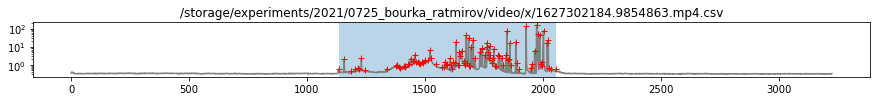

0.021456495589414593 0.1212622794707297 0.1427187750601443 0.12874333400160384 0.003066929809846057
0.090235314755413 121.63208074378508
0.806 s


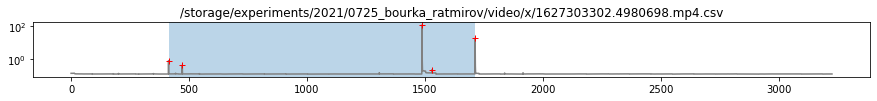

0.10283179631114692 2.7337184242181234 2.8365502205292703 2.7909616705092226 0.018357890496405366
0.20585906174819568 116.68676072574178
1.42 s


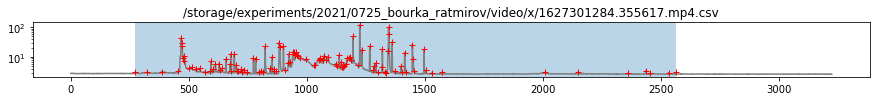

0.09444165998396148 1.4247030372894949 1.5191446972734564 1.465455869085806 0.018424248732996987
0.19551799318364083 215.54821822373697
0.708 s


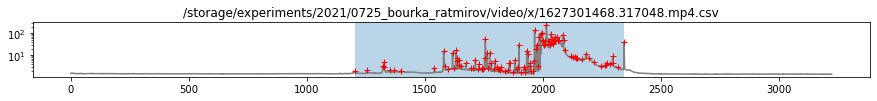

0.015314254210104294 0.1253107457898957 0.140625 0.13654240176423416 0.00394464202000465
0.032485465116279116 167.09415472133117
0.785 s


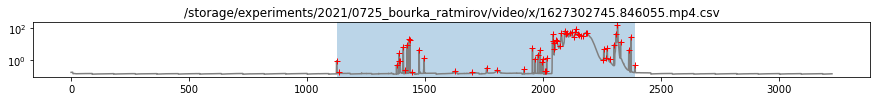

/storage/experiments/2021/0726_bourka_zabori 620.2000009 True
0.34664945870088104 86.91989900761828 87.26654846631916 87.07758816158783 0.06046430992714006
0.7525824478749001 7.039174017642338
0.485 s


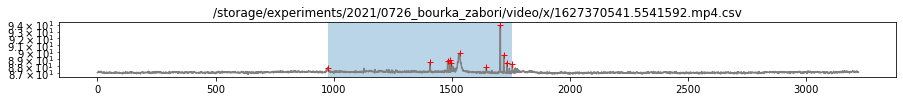

0.2656312650360775 115.39647278468324 115.66210404971932 115.5434607934042 0.05486832183919067
0.533085655573359 19.34175646551725
0.458 s


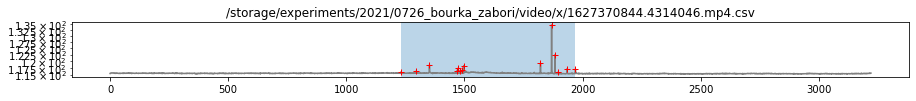

0.3398531475541233 126.05718223736967 126.3970353849238 126.20509947624299 0.056313324493719986
0.6924456194868043 0.975902165196473
0.104 s


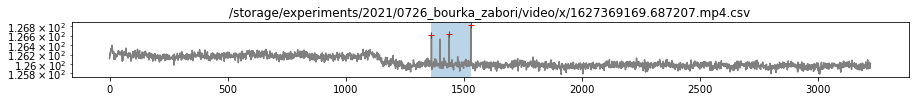

0.2655861567762656 152.0958613171612 152.36144747393746 152.26581649709308 0.04819296802739942
0.5885988873295958 1.7301461006415195
0.277 s


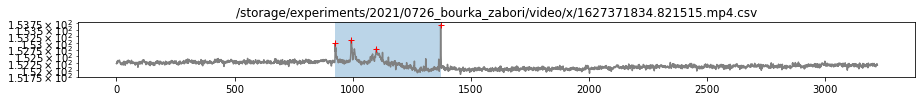

0.4823614174017621 61.8205656074579 62.30292702485966 62.056792151162796 0.08985343801211
1.5882054430633445 5.291191359262228
0.112 s


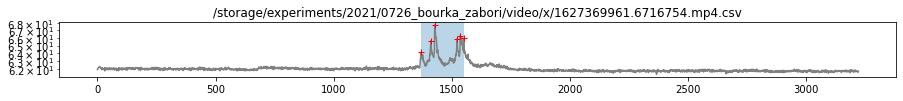

0.3701884522854897 60.20046110665597 60.57064955894146 60.403575030072176 0.07754119568208825
0.8339389534883779 3.0744399057738576
0.539 s


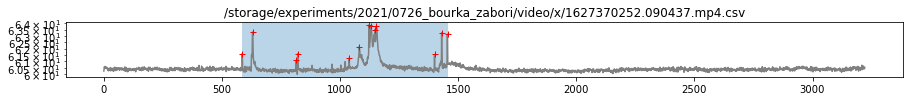

/storage/experiments/2021/0803_bourka_votice 620.2000009 True
/storage/experiments/2021/0807_bourka_sobeslav 620.2000009 False
0.3678879310344598 189.55084327385725 189.9187312048917 189.715206420409 0.07828396500452116
0.7802225340817586 71.14601794306338
0.961 s


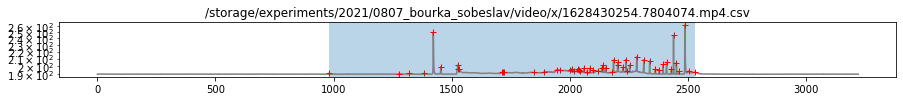

0.32499373496389694 189.5441108660786 189.8691046010425 189.69236498847238 0.06396356284298446
0.6794093323977108 43.72906350240578
0.776 s


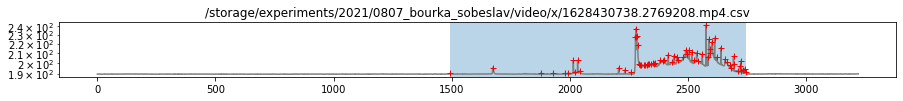

0.3441158781074307 189.8107683440257 190.15488422213312 190.01883026764236 0.061839872133390074
0.726130212509986 6.3369211106656
0.897 s


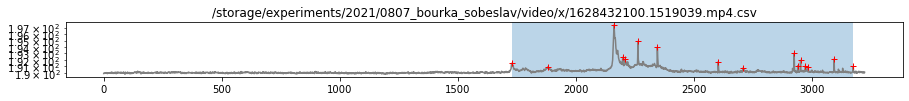

0.3389960906174849 189.7958111968725 190.13480728749 189.92635904921804 0.058275994628242705
0.6951972233360095 49.59847509021651
0.414 s


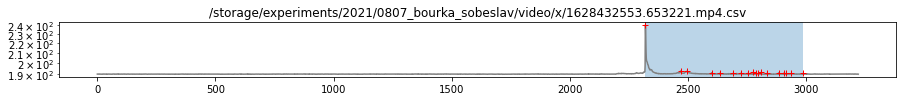

0.3715078688853737 189.88785836006412 190.2593662289495 190.0551235841018 0.059361221715028355
0.7630701182838209 51.93815031074581
0.615 s


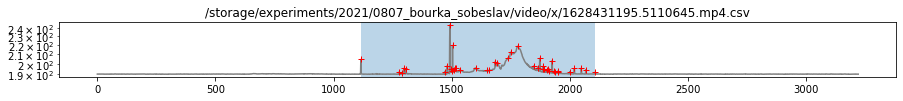

0.3112582698476558 189.66103523456292 189.97229350441057 189.82722609262228 0.05812144250361194
0.6339590016038414 86.82249899759421
0.605 s


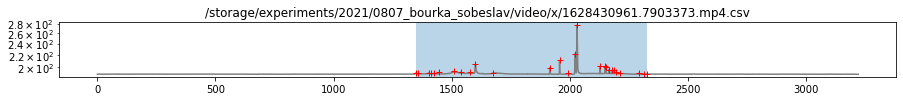

0.3385149358460069 189.81567010825984 190.15418504410584 189.97883833700894 0.06773256033634587
0.6985991379310406 266.205350340818
1.35 s


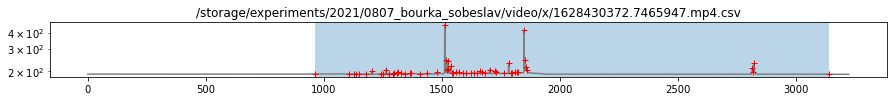

0.34579616078593745 190.01543579591015 190.3612319566961 190.1885206620891 0.07133643226209542
0.7976418404169578 41.77528944466721
1.115 s


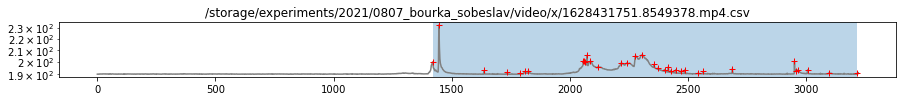

0.49131164795508653 189.8599250701684 190.3512367181235 190.0996494211107 0.07378106141843638
1.213058841218924 2.8873346030473215
0.382 s


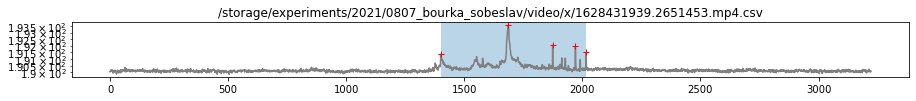

0.02363296912590221 0.1267466920609462 0.1503796611868484 0.13471529170008018 0.002474699089071609
0.059193313953488313 22.938001202886927
0.208 s


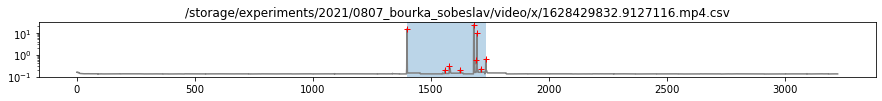

0.24388156575787434 189.9651137730553 190.20899533881317 190.08491337961107 0.05669970685652522
0.5097421311147059 410.3459828588613
0.859 s


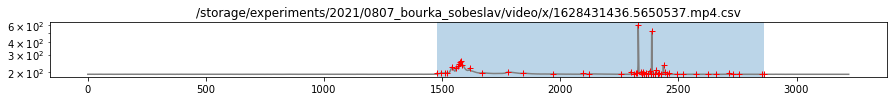

0.024200581395348794 0.1230365376904571 0.1472371190858059 0.13693006966720123 0.0028373015391775325
0.055667351643945484 123.76216043504412
0.33 s


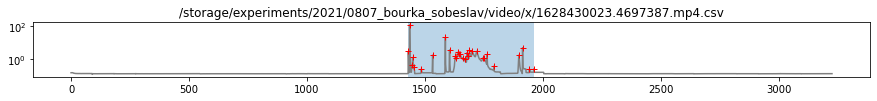

0.29935720729750415 189.4531463011227 189.7525035084202 189.58537642842822 0.057796160460033406
0.6525623997593755 46.70080693664792
1.236 s


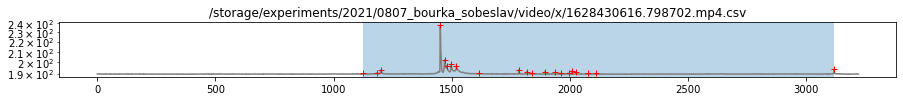

0.3157089514835718 189.8880199979952 190.20372894947877 190.0404742632318 0.06833122311639879
0.6714702786688065 16.10161512630313
0.667 s


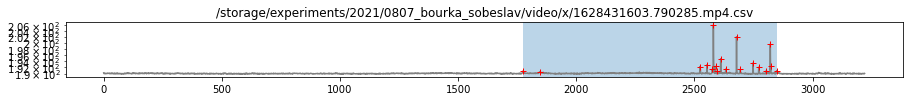

0.2755626002405904 189.66620764835605 189.94177024859664 189.78245937750606 0.0552178812852302
0.5811973736969094 33.18815406976748
0.566 s


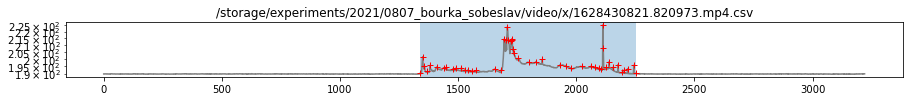

0.010393694867682407 0.1332084502806736 0.143602145148356 0.13878037289494777 0.002662890099954834
0.029560946271050492 64.4819003107458
0.718 s


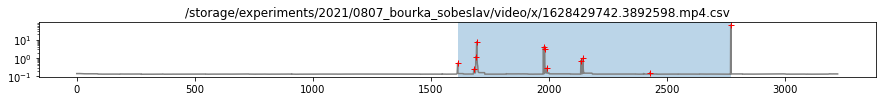

0.019667201283079416 0.1295697173215717 0.1492369186046511 0.13610981355252602 0.0024738598072608312
0.0519759923817161 158.30477270449077
0.465 s


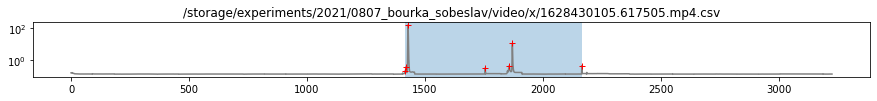

/storage/experiments/2021/0815_bourka_veseli_auto1 620.2000009 False
0.7779332898957421 89.72101669005613 90.49894997995187 90.09263778067361 0.14765592871996985
1.6036324679230063 34.081466770248596
0.284 s


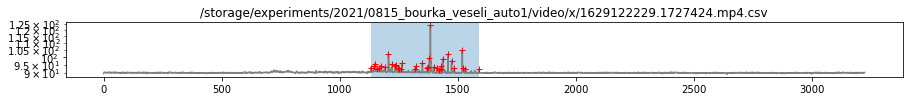

0.7887329591018357 76.09263482357659 76.88136778267842 76.46452934542906 0.17348749499222038
1.5775223035284682 51.48989825581394
0.786 s


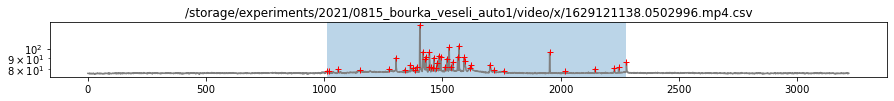

0.740820469125893 87.7910222032879 88.53184267241379 88.2392230227546 0.14192351202931566
1.618698626704088 68.75002506014434
0.556 s


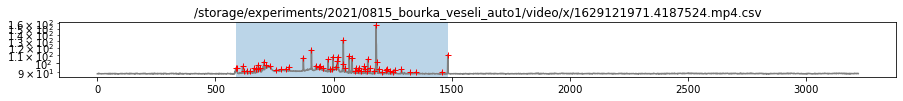

0.8152791700080115 70.3421436447474 71.1574228147554 70.80536374799519 0.18360275272035056
1.7243722433841242 54.68060470128307
0.706 s


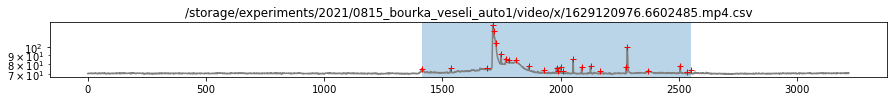

/storage/experiments/2021/0815_bourka_veseli_auto0 620.2000009 False
0.0079465717722534 0.1000375902165196 0.107984161988773 0.10455139835605444 0.0024278568949546056
0.019848887329591003 54.1445957798717
0.323 s


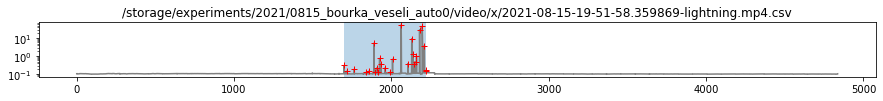

0.012776914595028097 0.0998245789895749 0.112601493584603 0.10263617682437846 0.0017983528801716743
0.0368095930232558 67.87071596832398
0.522 s


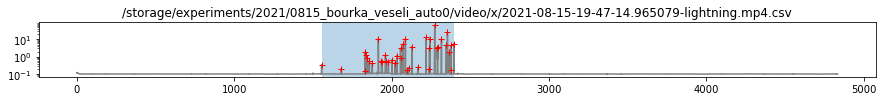

0.006860214514835608 0.097478949478749 0.1043391639935846 0.10322178227746587 0.0007851207869657725
0.017005813953488394 356.9622970128308
0.351 s


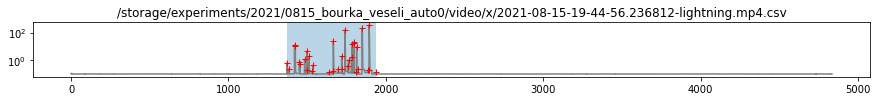

0.015551072574178107 0.0968211206896551 0.1123721932638332 0.10057883921411387 0.001753155750853074
0.041469526864474804 4.0054317862870885
0.275 s


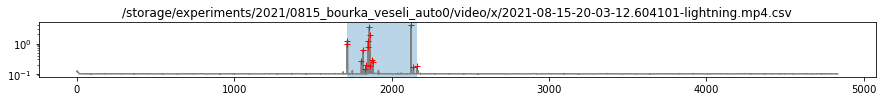

0.004540898155573306 0.0969977947072975 0.1015386928628708 0.1001732031876503 0.0007127422034015539
0.3306435445068163 0.747369937850842
0.113 s


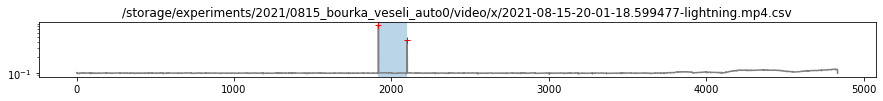

0.0055332798716920956 0.0965316760224538 0.1020649558941459 0.10031425421010418 0.0007815872743185039
0.014251704089815492 116.75338311948678
0.536 s


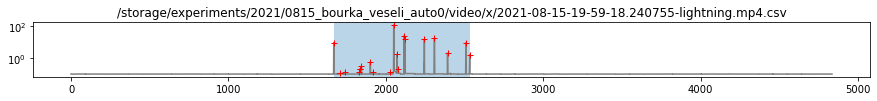

0.007713512429831593 0.0977120088211708 0.1054255212510024 0.10141722634322368 0.0009344297967235256
0.0966193865276664 52.121842421812346
0.441 s


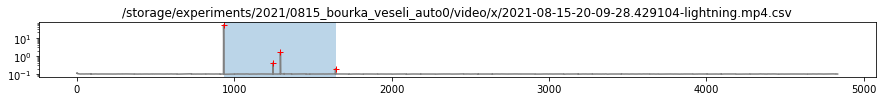

0.010179430633520406 0.1041712610264635 0.1143506916599839 0.11028519697273448 0.0017606033649368838
0.020771100641539697 104.84932462910986
0.258 s


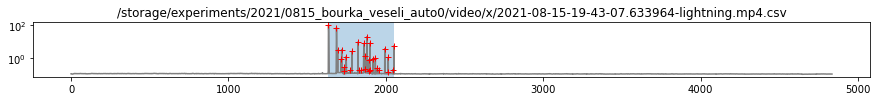

0.012219326383320003 0.098893594627105 0.111112921010425 0.10187132868885324 0.001895720054610493
0.034104350441058584 104.53335129310344
0.239 s


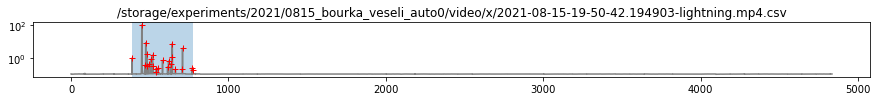

0.005510725741780298 0.0994825080192461 0.1049932337610264 0.10290909432638326 0.0010761418772885821
0.025220529270248607 14.229176273055334
0.408 s


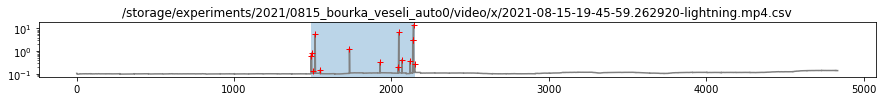

0.030731255012028905 0.1032816259021651 0.134012880914194 0.11943756265036085 0.006303686912804547
0.061636678027265385 57.229289043704895
0.333 s


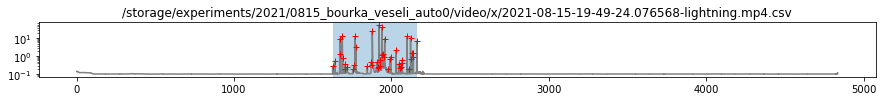

0.010679380513231793 0.098749498797113 0.1094288793103448 0.10137144145950278 0.001661897833993395
0.03672438853247799 2.5929631114675225
0.471 s


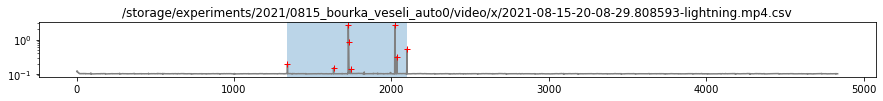

0.0030410485164393958 0.0988171611868484 0.1018582097032878 0.10039554931836406 0.000741649437652981
0.006450481154771495 0.1980152365677626
0.306 s


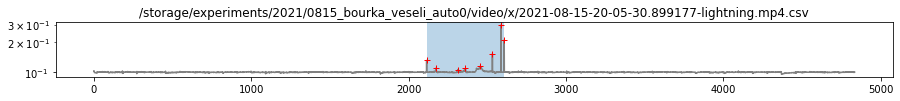

0.0191672514033681 0.0968436748195669 0.116010926222935 0.1007047539093825 0.001700664253606794
0.038989825581396076 117.3711733159583
1.271 s


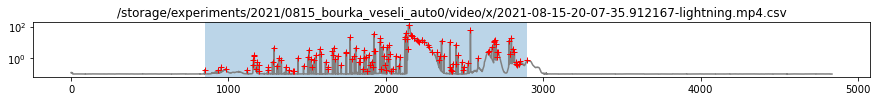

0.010691910585405001 0.0931485565356856 0.1038404671210906 0.10204805282678424 0.0011581847947876834
0.022859863672814784 101.70874974939855
0.618 s


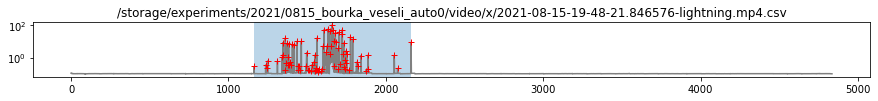

0.008717171210906191 0.0969150962309542 0.1056322674418604 0.103802375701684 0.001270222849979548
0.01848060344827579 3.231186096631917
0.5 s


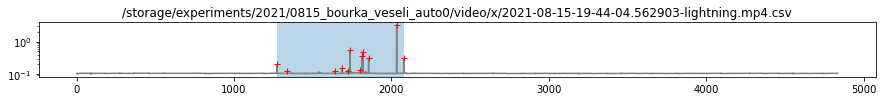

0.007457898957498002 0.0999862169206094 0.1074441158781074 0.10495028067361663 0.0007963589302471284
0.065874348436247 0.9308891339214114
0.056 s


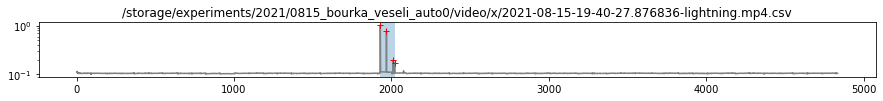

0.015216519647153204 0.0952573676824378 0.110473887329591 0.1027617156174819 0.0021352351914697247
0.03297037890938248 25.392196271050523
0.384 s


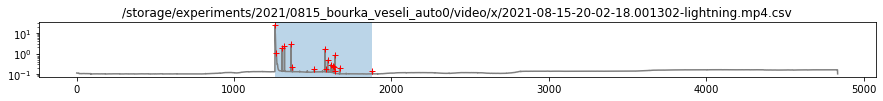

0.0074528869286287075 0.0997343624699278 0.1071872493985565 0.10492880412991173 0.001437362698291178
0.016901814354450692 1.8512755613472334
0.582 s


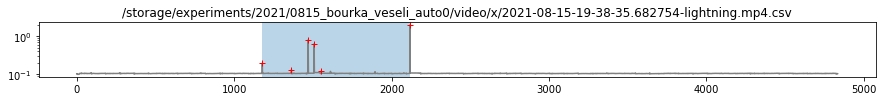

0.006025711708099499 0.0986855954290296 0.1047113071371291 0.10052011076583796 0.0010751286066283526
0.014427125100240606 11.35993258821171
0.407 s


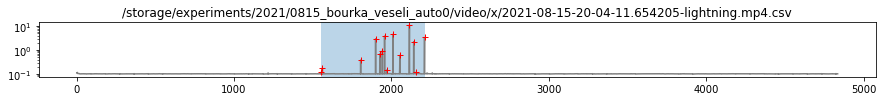

0.006713612670409 0.0989938352044907 0.1057074478748997 0.10390989625100235 0.0007047263874070705
0.021573025260625503 0.7715391940657579
0.166 s


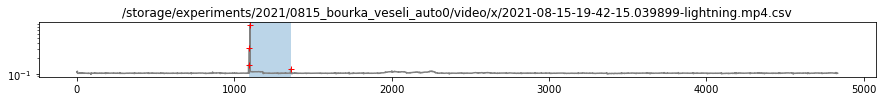

0.00569867682437851 0.108985314755413 0.1146839915797915 0.11316553478348038 0.0008027421055415285
1.4754235164394547 21.301818113472333
0.964 s


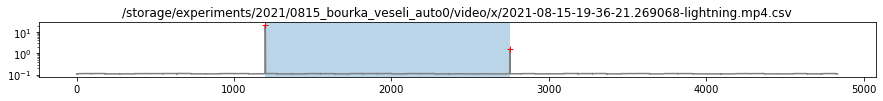

0.007619536888532494 0.0982495489174017 0.1058690858059342 0.10418072123095425 0.0015796539720774213
0.01625902165196469 12.952076232959103
0.578 s


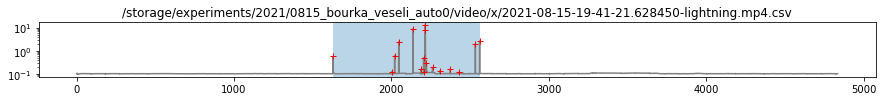

0.0037239374498796995 0.0976042502004811 0.1013281876503608 0.10017540848035279 0.0006315750630513019
0.00807187249398561 1.5479839113873295
0.301 s


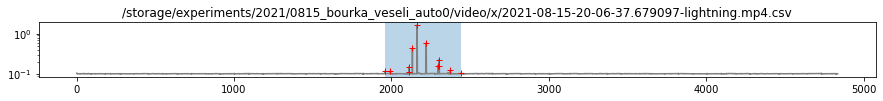

/storage/experiments/2021/0816_bourka_sobeslav 620.2000009 True
0.14165873095424786 147.50662214314357 147.64828087409782 147.59355662339613 0.021064848356718745
0.2853398155573359 1.5423641740176492
0.298 s


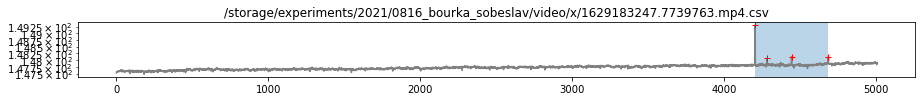

0.5607934041699991 125.24364349438652 125.80443689855652 125.56267884172016 0.11192354397983675
1.6649684242181308 4.782396501603856
0.094 s


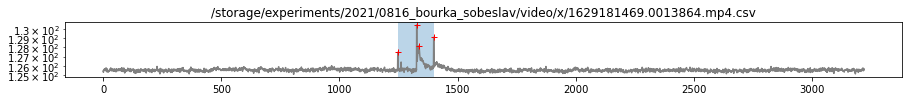

0.5680595930232357 125.7756653468324 126.34372493985563 126.05355884121894 0.13086751936814184
2.143424218123471 109.69015011026464
0.049 s


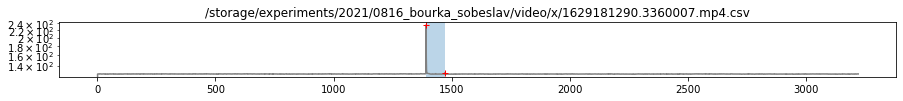

0.49245814955892797 133.80128182638333 134.29373997594226 134.04414826834397 0.10714447936345127
1.6167627305533472 5.0287477445870366
0.161 s


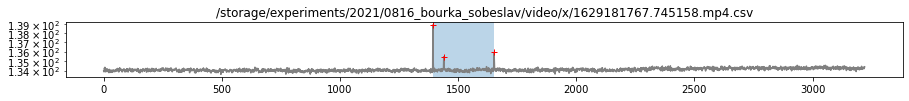

/storage/experiments/2021/0822_bourka_sobeslav_auto0 620.2000009 True
0.2780022052926796 110.8609224639134 111.13892466920608 111.01256935394952 0.06049202985779929
0.699819566960727 25.864058740978322
0.259 s


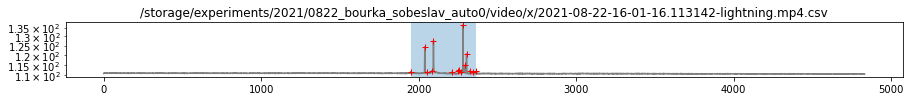

10.125114023656764 98.27276338211708 108.39787740577384 98.80984530372898 1.324672626285856
50.117440607457894 50.117440607457894
0.0 s


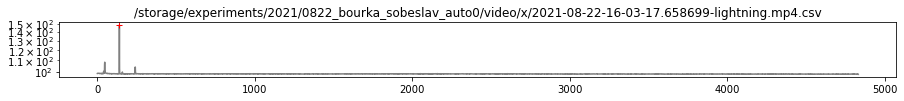

In [2]:
'''
d = [{'dir':"/storage/experiments/2021/0605_bourka_radosovice",'snap':564.9549943},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica",'snap':620.2000009}
#"/storage/experiments/2021/0713_bourka_exit29_D8",\
#"/storage/experiments/2021/0609_bourka_sobeslav"]
#"/storage/experiments/2021/0713_bourka_exit29_D8",\ # stroboskopicka bourka, nelze rozlisit jednotlive blesky
    ]
'''
d = [\
{'dir':"/storage/experiments/2021/0605_bourka_radosovice", 'snap':564.9549943, 'day':True},\
{'dir':"/storage/experiments/2021/0609_bourka_sobeslav", 'snap':348.1999993, 'day':True},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0714_bourka_martin", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0714_bourka_sobeslav", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0725_bourka_ratmirov", 'snap':620.2000009, 'day':False},\
{'dir':"/storage/experiments/2021/0726_bourka_zabori", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0803_bourka_votice", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0807_bourka_sobeslav", 'snap':620.2000009, 'day':False},\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto1", 'snap':620.2000009, 'day':False},\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto0", 'snap':620.2000009, 'day':False},\
{'dir':"/storage/experiments/2021/0816_bourka_sobeslav", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0822_bourka_sobeslav_auto0", 'snap':620.2000009, 'day':True}]
#'''

files = pd.DataFrame( columns=['name', 'duration','bourka'])

WINDOW_SIZE = 100

bourka = 0
for directory in d:
    print(directory['dir'],directory['snap'],directory['day'])

    for f in glob.iglob(directory['dir'] + "/video/x/*.csv"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        ss = f.split('.')
        sss= (ss[0]+'.'+ss[1]).split('/x')
        ff = sss[0]+sss[1]
        
        snap = directory['snap'] 
        
        # Import light curve
        light_curve = pd.read_csv(f, names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        #signal_samples=light_curve[["illuminance"]].to_numpy()
        maximum = max(light_curve["illuminance"].iloc[10:10+WINDOW_SIZE])
        minimum = min(light_curve["illuminance"].iloc[10:10+WINDOW_SIZE])
        amplitude = maximum - minimum
        stddev = light_curve["illuminance"].iloc[10:10+WINDOW_SIZE].std()
        avg = light_curve["illuminance"].iloc[10:10+WINDOW_SIZE].mean()
        print(amplitude, minimum, maximum, avg, stddev)
        peaks, properties = find_peaks(light_curve["illuminance"], prominence = 2*amplitude, wlen=WINDOW_SIZE)
        #xx = light_curve["illuminance"].rolling(100).mean()
        try:
            print(properties["prominences"].min(), properties["prominences"].max())

            peaks = peaks[peaks > 100]
            files = files.append({'name':f,'duration':round((peaks[-1] - peaks[0]) * snap /1000000, 3),'bourka':bourka, 'day':directory['day']}, ignore_index=True)
            print(round((peaks[-1] - peaks[0]) * snap /1000000, 3), 's')
        except:
            pass        
        
        #peaks, _ = find_peaks(light_curve["illuminance"], prominence = properties["prominences"].max())
        
        try:
            plt.figure(figsize=(15,1))
            plt.yscale('log')
            #plt.plot(signal_samples,c='gray')
            plt.plot(light_curve["illuminance"],c='gray')
            #plt.plot(xx,c='red')
            #plt.ylim(minimum,minimum+(maximum-minimum)/5)
            plt.plot(peaks,light_curve[["illuminance"]].iloc[peaks], ls='', marker='+', color='red')
            plt.axvspan(peaks[0],peaks[-1],alpha=0.3)
            #plt.plot(light_curve["illuminance"].loc[light_curve["illuminance"]>(avg+stddev/2)], color='red')
            #plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
            plt.title(f)
            plt.show()
        except:
            pass
    bourka += 1

flashes 107
median 0.485
mean 0.5469252336448599
median night 0.56


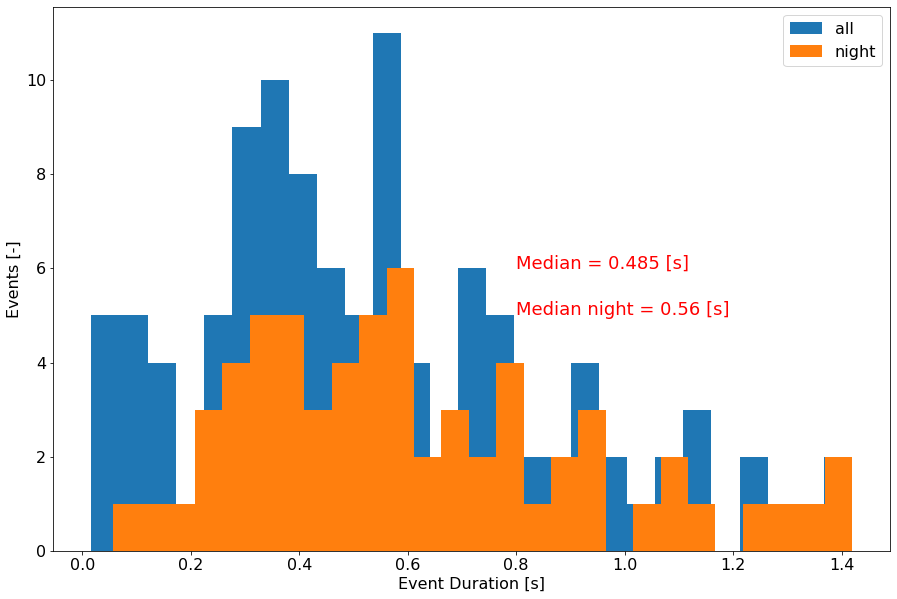

In [4]:
fig = plt.figure(figsize=(15, 10))
matplotlib.rcParams.update({'font.size': 16})

BINS = 27

plt.hist(files.loc[files['duration']>0,'duration'], bins=BINS, label='all')
plt.hist(files.loc[(files['duration']>0) & (files['day']==False),'duration'], bins=BINS, label='night')
#histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
print('flashes', len(files.loc[files['duration']>0]))
plt.xlabel('Event Duration [s]')
plt.ylabel('Events [-]')
print('median',files.loc[files['duration']>0,'duration'].median())
print('mean',files.loc[files['duration']>0,'duration'].mean())
print('median night',files.loc[(files['duration']>0) & (files['day']==False),'duration'].median())
#print(files.loc[files['duration']>0,'duration'].mode())
plt.text(0.8, 6, r'Median = ' + str(files.loc[files['duration']>0,'duration'].median()) + ' [s]', fontsize=18, color='r')
plt.text(0.8, 5, r'Median night = ' + str(files.loc[(files['duration']>0) & (files['day']==False),'duration'].median()) + ' [s]', fontsize=18, color='r')
plt.legend()

In [31]:
for name in files.loc[files['duration']<0.1].name:
    print(name)

/storage/experiments/2021/0605_bourka_radosovice/video/x/vid_2021-06-05_17-05-16.mp4.csv
/storage/experiments/2021/0605_bourka_radosovice/video/x/vid_2021-06-05_16-52-53.mp4.csv
/storage/experiments/2021/0609_bourka_sobeslav/video/x/vid_2021-06-09_10-38-03.mp4.csv
/storage/experiments/2021/0711_bourka_stiavnica/video/x/vid_2021-07-11_08-41-05.mp4.csv
/storage/experiments/2021/0711_bourka_stiavnica/video/x/vid_2021-07-11_08-43-27.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/x/1628429929.155008.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto0/video/x/2021-08-15-19-40-27.876836-lightning.mp4.csv
/storage/experiments/2021/0816_bourka_sobeslav/video/x/1629181469.0013864.mp4.csv
/storage/experiments/2021/0816_bourka_sobeslav/video/x/1629181290.3360007.mp4.csv
/storage/experiments/2021/0822_bourka_sobeslav_auto0/video/x/2021-08-22-16-03-17.658699-lightning.mp4.csv


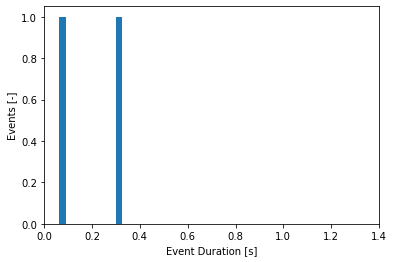

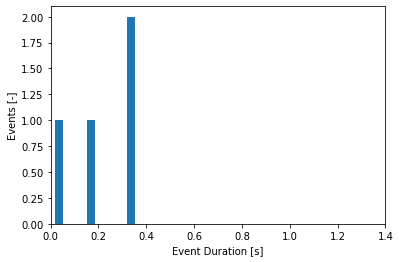

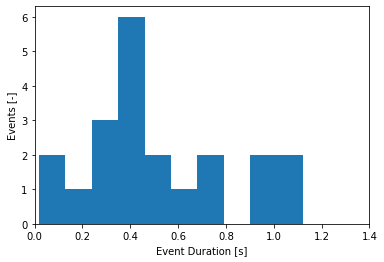

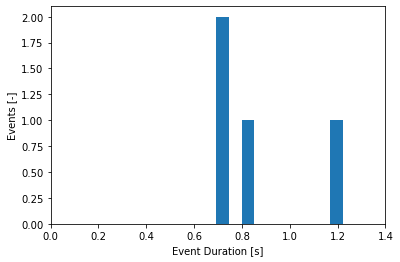

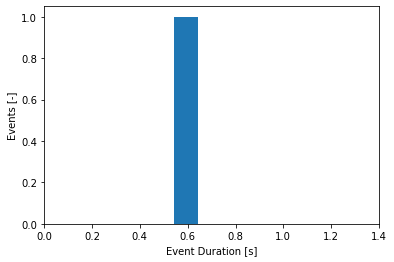

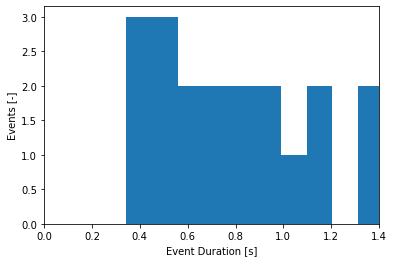

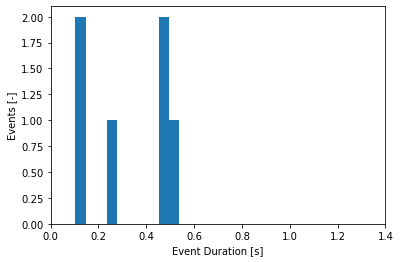

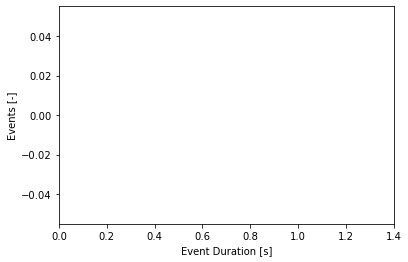

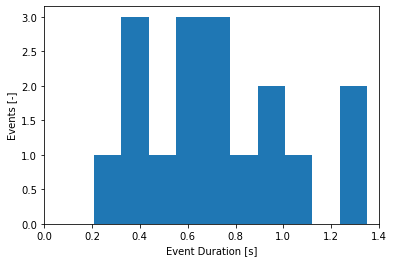

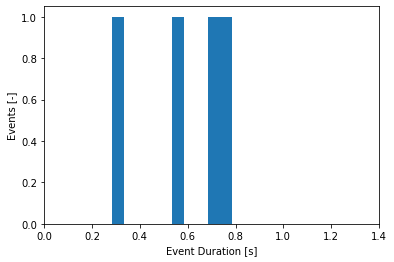

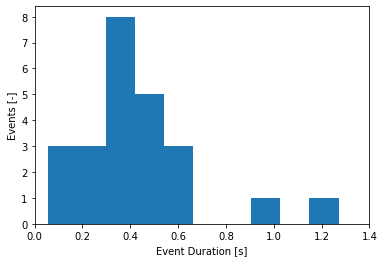

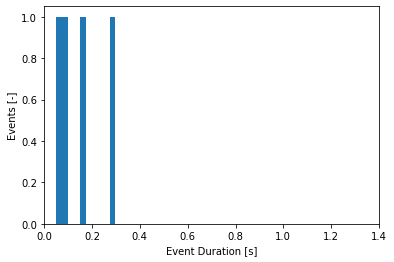

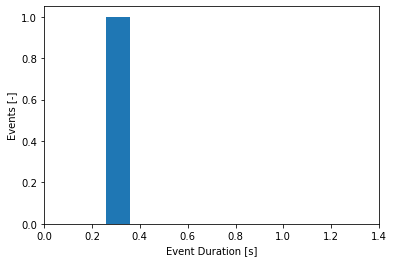

In [210]:
for n in range(bourka):
    plt.hist(files.loc[files['bourka']==n].loc[files['duration']>0,'duration'])
    plt.xlabel('Event Duration [s]')
    plt.ylabel('Events [-]')
    plt.xlim(0,1.4)
    plt.show()
    #files.loc[files['duration']>0,'duration'].median()

In [34]:
'''
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0713_bourka_exit29_D8",\
"/storage/experiments/2021/0609_bourka_sobeslav"]
#"/storage/experiments/2021/0713_bourka_exit29_D8",\ # stroboskopicka bourka, nelze rozlisit jednotlive blesky

'''
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0609_bourka_sobeslav",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0714_bourka_martin",\
"/storage/experiments/2021/0714_bourka_sobeslav",\
"/storage/experiments/2021/0725_bourka_ratmirov",\
"/storage/experiments/2021/0726_bourka_zabori",\
"/storage/experiments/2021/0803_bourka_votice",\
"/storage/experiments/2021/0807_bourka_sobeslav",\
"/storage/experiments/2021/0815_bourka_veseli_auto1",\
"/storage/experiments/2021/0815_bourka_veseli_auto0",\
"/storage/experiments/2021/0816_bourka_sobeslav",\
"/storage/experiments/2021/0822_bourka_sobeslav_auto0"]
#'''

files = pd.DataFrame( columns=['name', 'width', 'height', 'frames'])

window_size = 100
threshold = 5

for directory in d:
    print(directory)

    for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        
        # Import light curve
        light_curve = pd.read_csv(f+'.csv', names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        vcap = cv2.VideoCapture(f)
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        video_length = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        signal_samples=light_curve[["illuminance"]].to_numpy()
        if len(signal_samples) > 0:
            start_sample = signal_samples[:window_size]
            start_noise_std = np.nanstd(np.where(np.isclose(start_sample,0), np.nan, start_sample))
            start_noise_mean = np.nanmean(np.where(np.isclose(start_sample,0), np.nan, start_sample))
            
            end_sample = signal_samples[-window_size:]
            end_noise_std = np.nanstd(np.where(np.isclose(end_sample,0), np.nan, end_sample))
            end_noise_mean = np.nanmean(np.where(np.isclose(end_sample,0), np.nan, end_sample))
            #print(start_noise_std, start_noise_mean, end_noise_std,end_noise_mean)


            for sample_num in range(0,len(signal_samples)):
                signal_mean =((end_noise_mean-start_noise_mean)/len(signal_samples))*sample_num + start_noise_mean
                z_score = (signal_samples[sample_num] - signal_mean) / start_noise_std
                if z_score > threshold:
                    event_start = sample_num
                    break

            for sample_num in reversed(range(0,len(signal_samples))):
                signal_mean =((end_noise_mean-start_noise_mean)/len(signal_samples))*sample_num + start_noise_mean
                z_score = (signal_samples[sample_num] - signal_mean) / end_noise_std
                if z_score > threshold:
                    event_end = sample_num
                    break
            '''
            try:
                plt.figure(figsize=(15,1))
                plt.tight_layout()
                plt.plot(signal_samples,c='gray')
                plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
                plt.show()
            except:
                pass
            '''

        else:
            event_start = float("NaN")
            event_end = float("NaN")
        
        #print(f, ',', int(width), ',', int(height), ',', video_length)
        files = files.append({'name':f, 'width':int(width), 'height':int(height), 'frames':video_length, 'event_start':event_start, 'event_end':event_end}, ignore_index=True)
        vcap.release()
files

/storage/experiments/2021/0605_bourka_radosovice
/storage/experiments/2021/0609_bourka_sobeslav
/storage/experiments/2021/0711_bourka_stiavnica
/storage/experiments/2021/0714_bourka_martin
/storage/experiments/2021/0714_bourka_sobeslav
/storage/experiments/2021/0725_bourka_ratmirov
/storage/experiments/2021/0726_bourka_zabori
/storage/experiments/2021/0803_bourka_votice
/storage/experiments/2021/0807_bourka_sobeslav
/storage/experiments/2021/0815_bourka_veseli_auto1
/storage/experiments/2021/0815_bourka_veseli_auto0
/storage/experiments/2021/0816_bourka_sobeslav
/storage/experiments/2021/0822_bourka_sobeslav_auto0


,name,width,height,frames,event_end,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9732.0,9495.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9520.0,8930.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,11421.0,1055.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,4516.0,3898.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,4149.0,3076.0
...,...,...,...,...,...,...
191,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,1649.0,485.0
192,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4833,1683.0,462.0
193,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,1683.0,462.0
194,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,NaN,NaN


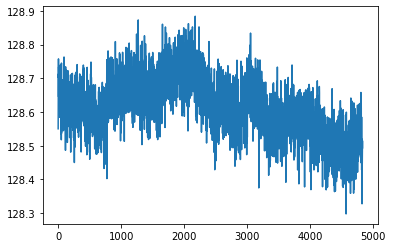

In [83]:
plt.plot(light_curve['frame'],light_curve['illuminance'])

In [84]:
light_curve

,frame,illuminance
0,0,128.550090
1,1,128.662144
2,2,128.653799
3,3,128.712568
4,4,128.702863
...,...,...
4828,4828,128.450104
4829,4829,128.477717
4830,4830,128.483539
4831,4831,128.514541


In [85]:
files

,name,width,height,frames,event_end,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9732.0,9495.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9918.0,8930.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,11421.0,10061.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,7371.0,3898.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,4125.0,3076.0
...,...,...,...,...,...,...
201,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,2366.0,485.0
202,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4833,4277.0,1115.0
203,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,4277.0,1457.0
204,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,NaN,NaN
